#  the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


In [2]:
#importing the warning labraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing all useful labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
# reading the loan data set 
df=pd.read_csv("loan.csv" )

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#knowing the information about dataframe no.of rows and columns and their data types
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [7]:
# it describe the data frame
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [73]:
#knowing the null values percentage in each column
pd.options.display.min_rows=100
100*df.isnull().sum()/len(df)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [8]:
#deleting the columns having morethan 40% of missing values
missing_vaues_column_list=df[df.columns[100*df.isnull().sum()/len(df)>40]]
df.drop(missing_vaues_column_list, axis=1, inplace=True)


In [9]:
df.shape

(39717, 54)

In [10]:
pd.options.display.max_columns=75
df.head(30)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,13

In [11]:
100*df.isnull().sum()/len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
####dropping the unnecessary columns
df.drop(['id','member_id','issue_d','funded_amnt_inv','home_ownership','pymnt_plan','url','desc','title','zip_code','addr_state','earliest_cr_line','total_acc','initial_list_status','out_prncp_inv','total_rec_int','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','chargeoff_within_12_mths','delinq_amnt','tax_liens','application_type','acc_now_delinq'],axis=1,inplace=True)

In [14]:
df.drop(['emp_title','inq_last_6mths','open_acc','pub_rec','total_pymnt','total_pymnt_inv','total_rec_prncp'],axis=1,inplace=True)

In [15]:
df.shape

(39717, 19)

In [16]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
revol_bal               0.000000
revol_util              0.125891
out_prncp               0.000000
total_rec_late_fee      0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [17]:
df.isna().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
loan_status                0
total_rec_late_fee         0
out_prncp                  0
revol_bal                  0
delinq_2yrs                0
dti                        0
purpose                    0
loan_amnt                  0
funded_amnt                0
annual_inc                 0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
verification_status        0
dtype: int64

In [19]:
emp_len=df.emp_length.mode()[0]
emp_len

'10+ years'

In [20]:
 #fill the missing values with mode value of emp_length in df.
df.emp_length.fillna(emp_len,inplace=True)

In [21]:
rec_rate=df.pub_rec_bankruptcies.mean()
rec_rate

0.04325986673500769

In [22]:
#fill the missing values with mean value of pub_rec_bankruptcies in df.
df.pub_rec_bankruptcies.fillna(rec_rate,inplace=True)

In [23]:
#removing the % sign in revol_util
df['revol_util'] = df['revol_util'].str.replace("%",'').astype(float)

In [24]:
revol_rate=df.revol_util.mean()
revol_rate

48.83215241888723

In [25]:
#fill the missing values with mean value of revol_util in df.
df.revol_util.fillna(revol_rate,inplace=True)

In [26]:
df.isna().sum().sort_values(ascending=False)

loan_amnt               0
loan_status             0
total_rec_late_fee      0
out_prncp               0
revol_util              0
revol_bal               0
delinq_2yrs             0
dti                     0
purpose                 0
verification_status     0
funded_amnt             0
annual_inc              0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
pub_rec_bankruptcies    0
dtype: int64

In [27]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,revol_bal,revol_util,out_prncp,total_rec_late_fee,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,24000.0,Verified,Fully Paid,credit_card,27.65,0,13648,83.7,0.00,0.00,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,30000.0,Source Verified,Charged Off,car,1.00,0,1687,9.4,0.00,0.00,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2956,98.5,0.00,0.00,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,49200.0,Source Verified,Fully Paid,other,20.00,0,5598,21.0,0.00,16.97,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,80000.0,Source Verified,Current,other,17.94,0,27783,53.9,524.06,0.00,0.0


In [28]:
#removing the % sign in int_rate
df['int_rate'] = df['int_rate'].str.replace("%",'').astype(float)

In [29]:
#removing the % sign in int_rate
df['term'] = df['term'].str.replace("months",'').astype(int)

In [30]:
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [31]:
# now the data is cleaned and ready for analysis
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,revol_bal,revol_util,out_prncp,total_rec_late_fee,pub_rec_bankruptcies
0,5000,5000,36,10.65,162.87,B,B2,10,24000.0,Verified,Fully Paid,credit_card,27.65,0,13648,83.7,0.00,0.00,0.0
1,2500,2500,60,15.27,59.83,C,C4,0,30000.0,Source Verified,Charged Off,car,1.00,0,1687,9.4,0.00,0.00,0.0
2,2400,2400,36,15.96,84.33,C,C5,10,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2956,98.5,0.00,0.00,0.0
3,10000,10000,36,13.49,339.31,C,C1,10,49200.0,Source Verified,Fully Paid,other,20.00,0,5598,21.0,0.00,16.97,0.0
4,3000,3000,60,12.69,67.79,B,B5,1,80000.0,Source Verified,Current,other,17.94,0,27783,53.9,524.06,0.00,0.0


In [32]:
df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,revol_bal,revol_util,out_prncp,total_rec_late_fee,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,42.418007,12.021177,324.561922,5.109500,6.896893e+04,13.315130,0.146512,13382.528086,48.832152,51.227887,1.363015,0.043260
std,7456.670694,7187.238670,10.622815,3.724825,208.874874,3.607467,6.379377e+04,6.678594,0.491812,15885.016641,28.314793,375.172839,7.289979,0.202523
min,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,3703.000000,25.500000,0.000000,0.000000,0.000000
50%,10000.000000,9600.000000,36.000000,11.860000,280.220000,5.000000,5.900000e+04,13.400000,0.000000,8850.000000,49.200000,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,60.000000,14.590000,430.780000,10.000000,8.230000e+04,18.600000,0.000000,17058.000000,72.300000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,149588.000000,99.900000,6311.470000,180.200000,2.000000


In [49]:
df.annual_inc.describe()

count     35193.000000
mean      59133.755922
std       27006.920533
min        4000.000000
25%       39600.000000
50%       54996.000000
75%       75000.000000
max      142000.000000
Name: annual_inc, dtype: float64

In [33]:
#describe the loan_amnt variable in df.
df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

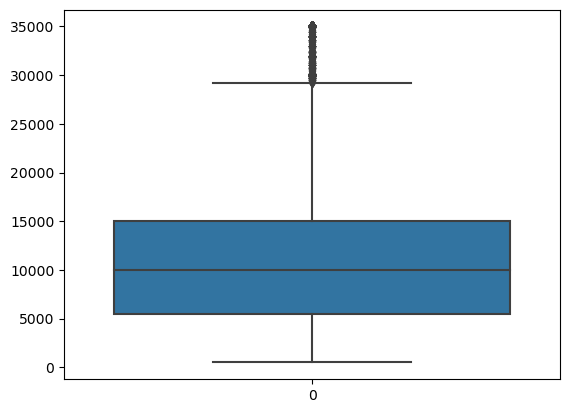

In [35]:
#plot the boxplot of loan_amnt variable.
sns.boxplot(df.loan_amnt)
plt.show()

In [43]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of loan_amnt variable
df.loan_amnt.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     9000.0
0.70    12500.0
0.90    20000.0
0.95    24000.0
0.99    25000.0
Name: loan_amnt, dtype: float64

In [45]:
#removing the outlier in loan_amnt 
quantile_95_loan = df['loan_amnt'].quantile(0.95)
df = df[df.loan_amnt <= quantile_95_loan]


<Axes: >

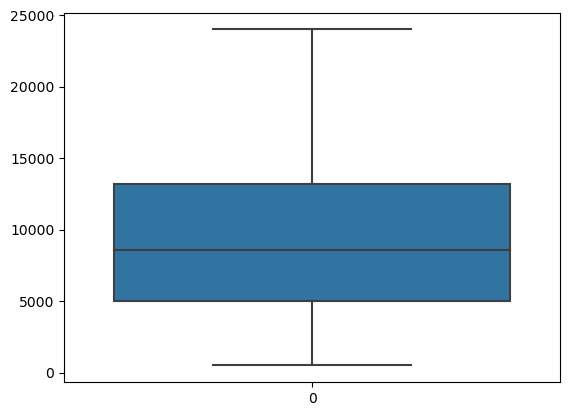

In [46]:
sns.boxplot(df.loan_amnt)


In [40]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of funded_amnt variable
df.funded_amnt.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     9250.0
0.70    12925.0
0.90    20000.0
0.95    25000.0
0.99    35000.0
Name: funded_amnt, dtype: float64

In [41]:
#removing the outlier in funded_amnt 
quantile_95_fund = df['funded_amnt'].quantile(0.95)
df = df[df.funded_amnt <= quantile_95_fund]


<Axes: >

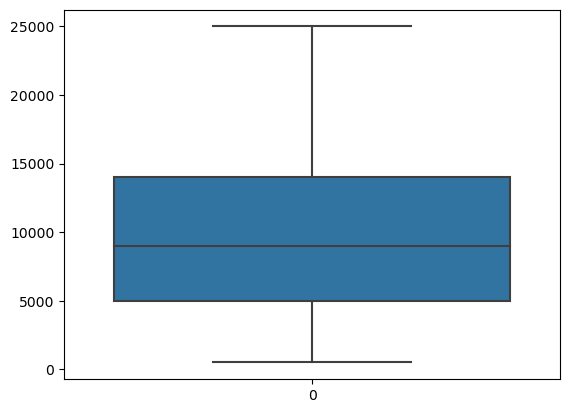

In [42]:
sns.boxplot(df.funded_amnt)


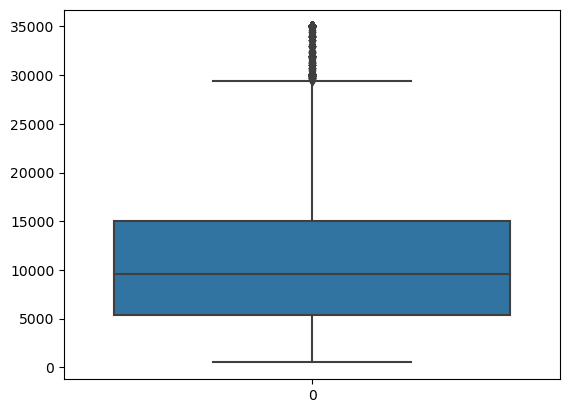

In [36]:
#plot the boxplot of loan_amnt variable.
sns.boxplot(df.funded_amnt)
plt.show()

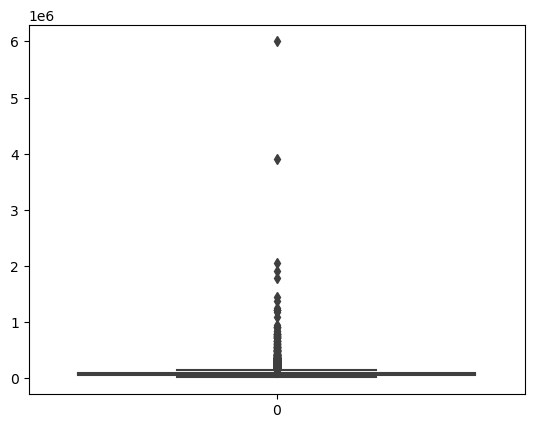

In [37]:
#plot the boxplot of annual_inc variable.
sns.boxplot(df.annual_inc)
plt.show()

In [106]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of annual_inc variable
df.annual_inc.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     59000.00
0.70     75600.00
0.90    116000.00
0.95    142000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [38]:
#removing the outlier in annual_inc 
quantile_95 = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= quantile_95]


<Axes: >

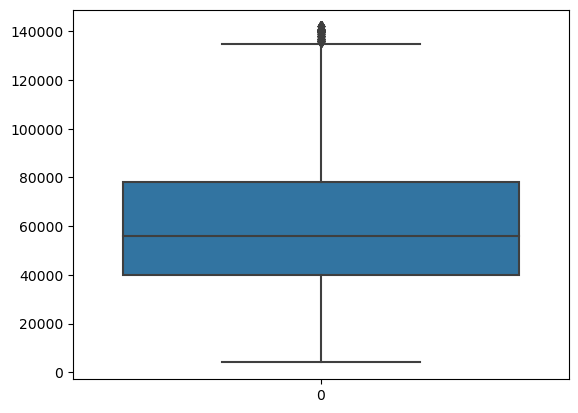

In [39]:
sns.boxplot(df.annual_inc)


In [50]:

df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,revol_bal,revol_util,out_prncp,total_rec_late_fee,pub_rec_bankruptcies
count,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000,35193.000000
mean,9594.204103,9430.324923,41.711363,11.755707,283.057060,4.983065,59133.755922,13.418400,0.146592,11637.387946,48.549584,32.960594,1.246713,0.045950
std,5524.252723,5391.620741,10.220372,3.600927,161.683348,3.585430,27006.920533,6.676322,0.494478,13018.419792,28.298069,257.152084,6.537161,0.208431
min,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,36.000000,8.900000,158.770000,2.000000,39600.000000,8.300000,0.000000,3422.000000,25.200000,0.000000,0.000000,0.000000
50%,8550.000000,8500.000000,36.000000,11.660000,257.320000,4.000000,54996.000000,13.510000,0.000000,8127.000000,48.832152,0.000000,0.000000,0.000000
75%,13200.000000,12850.000000,36.000000,14.220000,379.200000,9.000000,75000.000000,18.710000,0.000000,15245.000000,72.000000,0.000000,0.000000,0.000000
max,24000.000000,24000.000000,60.000000,24.400000,902.540000,10.000000,142000.000000,29.990000,11.000000,149000.000000,99.900000,4116.620000,165.690000,2.000000


In [73]:
# creating bins for int_rate,annual_inc,revol_util,cat_loan_amt
df['cat_int_rate'] = pd.cut(df['int_rate'], bins=4,precision =0,labels=['5%-9%','9%-15%','15%-19%','19%-24%'])
df['cat_annual_income'] = pd.cut(df['annual_inc'], bins=4,precision =0,labels=['4k-40k','40k-55k','55k-75k','75k-14l'])
df['cat_revol_util'] = pd.cut(df['revol_util'], bins=4,precision =0,labels=['0-25','25-50','50-70','70-100'])
df['cat_loan_amt'] = pd.cut(df['loan_amnt'], bins=4,precision =0,labels=['500-5k','5k-9k','9k-14k','14k-24k'])


In [52]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,revol_bal,revol_util,out_prncp,total_rec_late_fee,pub_rec_bankruptcies,cat_int_rate,cat_annual_income,cat_revol_util
0,5000,5000,36,10.65,162.87,B,B2,10,24000.0,Verified,Fully Paid,credit_card,27.65,0,13648,83.7,0.00,0.00,0.0,9%-15%,4k-40k,70-100
1,2500,2500,60,15.27,59.83,C,C4,0,30000.0,Source Verified,Charged Off,car,1.00,0,1687,9.4,0.00,0.00,0.0,15%-19%,4k-40k,0-25
2,2400,2400,36,15.96,84.33,C,C5,10,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2956,98.5,0.00,0.00,0.0,15%-19%,4k-40k,70-100
3,10000,10000,36,13.49,339.31,C,C1,10,49200.0,Source Verified,Fully Paid,other,20.00,0,5598,21.0,0.00,16.97,0.0,9%-15%,40k-55k,0-25
4,3000,3000,60,12.69,67.79,B,B5,1,80000.0,Source Verified,Current,other,17.94,0,27783,53.9,524.06,0.00,0.0,9%-15%,55k-75k,50-70


# Univariate Analysis

In [47]:
df.emp_length.value_counts(normalize= True)

emp_length
10    0.236070
0     0.120138
2     0.114000
3     0.105078
4     0.087915
1     0.084392
5     0.083227
6     0.056375
7     0.045094
8     0.036371
9     0.031341
Name: proportion, dtype: float64

[]

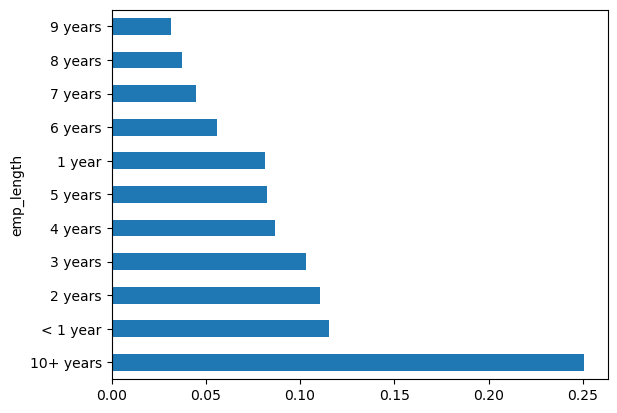

In [113]:
df.emp_length.value_counts(normalize= True).plot.barh()
plt.plot()

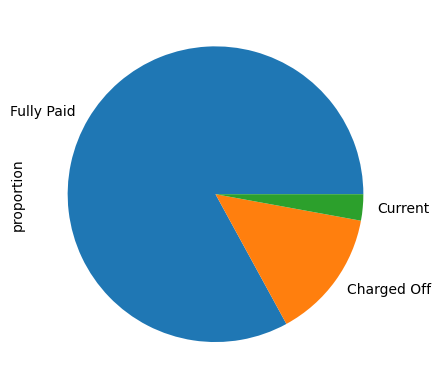

In [114]:
df.loan_status.value_counts(normalize= True).plot.pie()
plt.show()

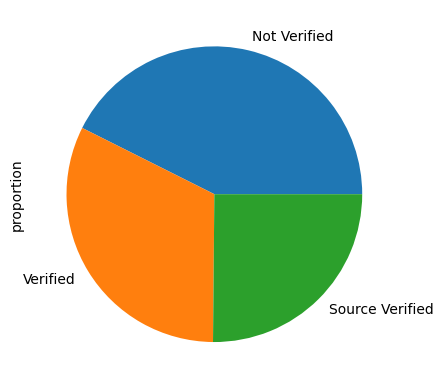

In [122]:
df.verification_status.value_counts(normalize= True).plot.pie()
plt.show()


[]

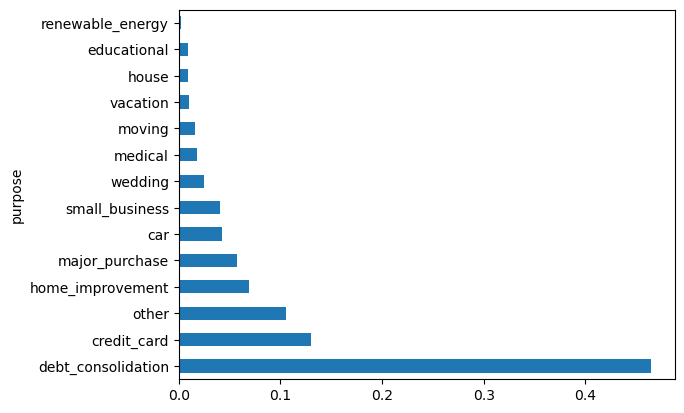

In [48]:
df.purpose.value_counts(normalize= True).plot.barh()
plt.plot()

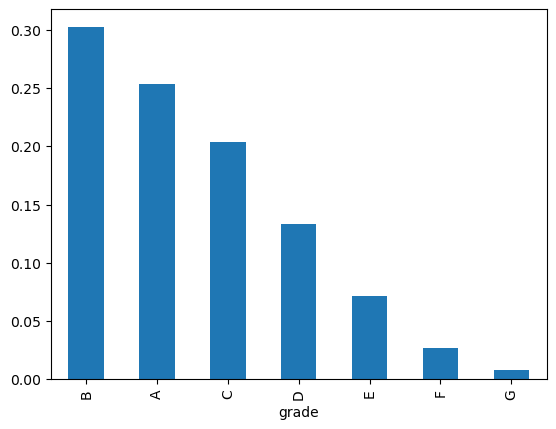

In [115]:
df.grade.value_counts(normalize= True).plot.bar()
plt.show()

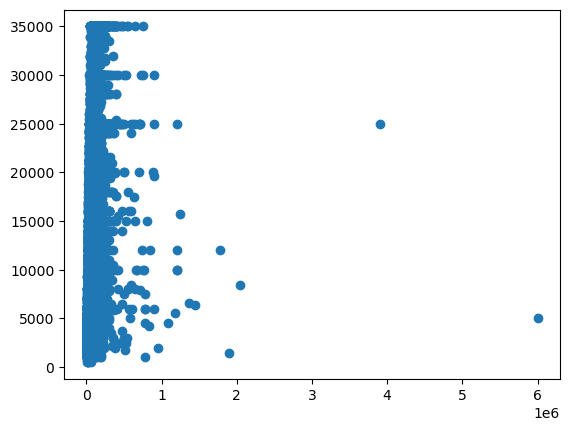

In [116]:
#plot the scatter plot of annual_inc and loan_amnt variable in df
plt.scatter(df.annual_inc, df.loan_amnt)
plt.show()

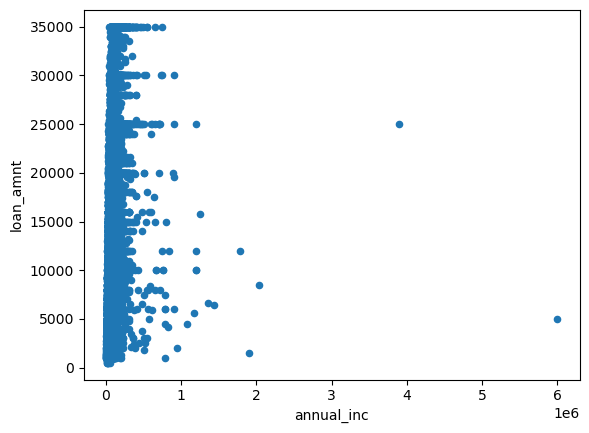

In [117]:
#plot the scatter plot of annual_inc and loan_amnt variable in df
df.plot.scatter(x='annual_inc', y='loan_amnt')
plt.show()

# Bi variate analysis

<Axes: xlabel='cat_annual_income', ylabel='count'>

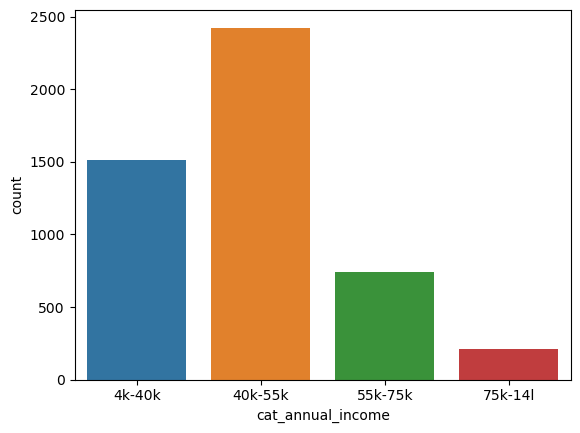

In [58]:
sns.countplot(x='cat_annual_income', data=df[df.loan_status == 'Charged Off'])


<Axes: xlabel='cat_int_rate', ylabel='count'>

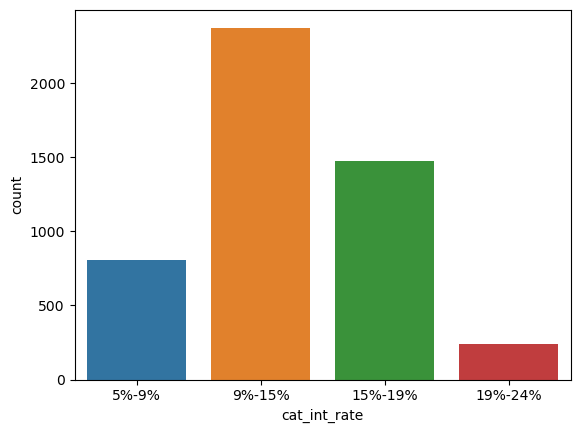

In [59]:
sns.countplot(x='cat_int_rate', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='cat_revol_util', ylabel='count'>

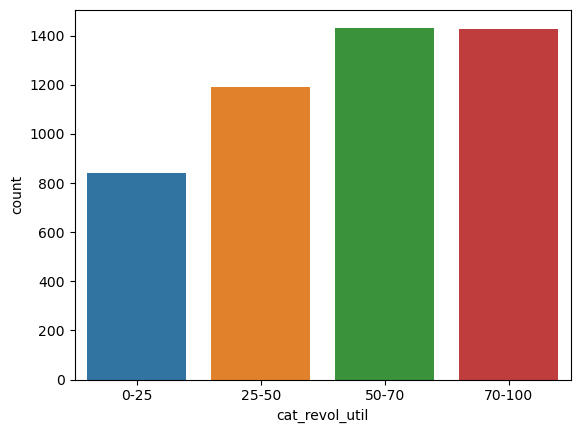

In [60]:
sns.countplot(x='cat_revol_util', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

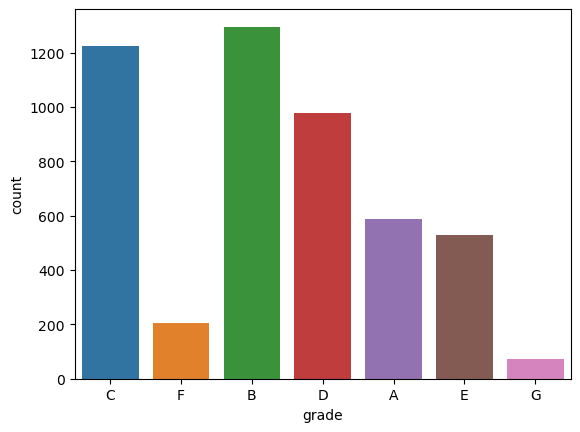

In [62]:
sns.countplot(x='grade', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

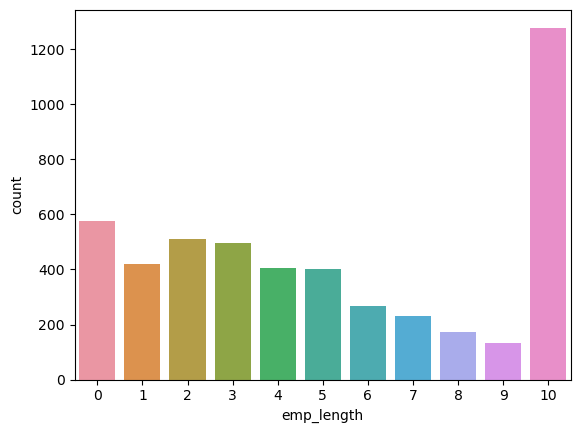

In [63]:
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

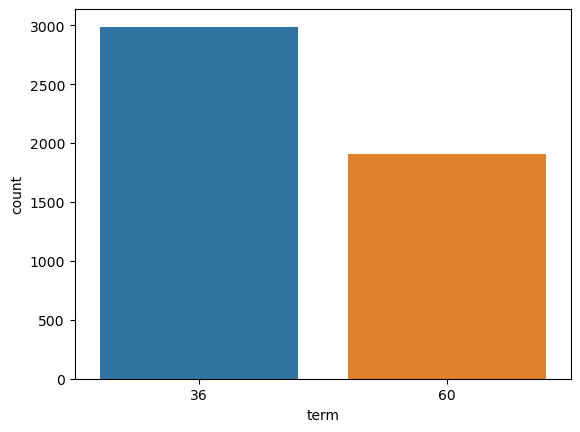

In [64]:
sns.countplot(x='term', data=df[df.loan_status == 'Charged Off'])

# Multi variate analysis

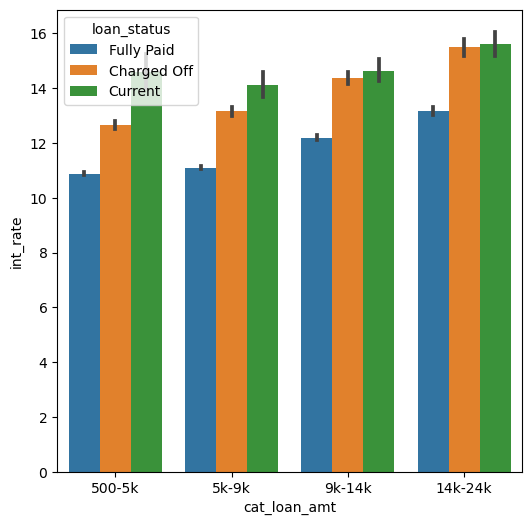

In [94]:
plt.figure(figsize=(6,6))
sns.barplot(data =df,x='cat_loan_amt', y='int_rate', hue ='loan_status')
plt.show()

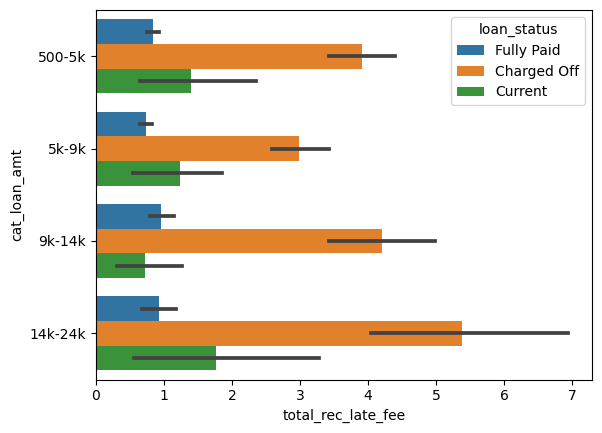

In [77]:
sns.barplot(data =df,y='cat_loan_amt', x='total_rec_late_fee', hue ='loan_status')
plt.show()

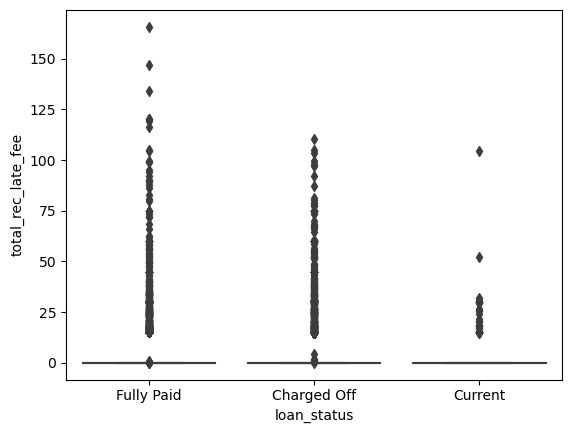

In [82]:

sns.boxplot(data=df,x="loan_status",y="total_rec_late_fee")
plt.show()

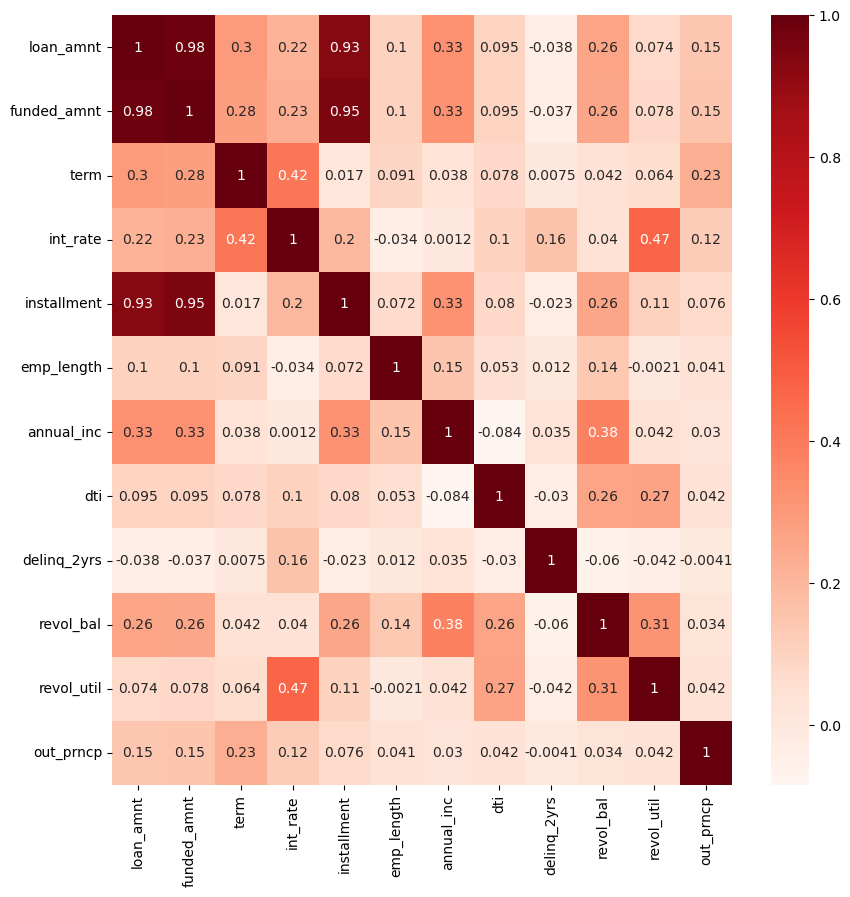

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[['loan_amnt','funded_amnt','term','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','revol_bal','revol_util','out_prncp']].corr(),annot=True,cmap="Reds")
plt.show()

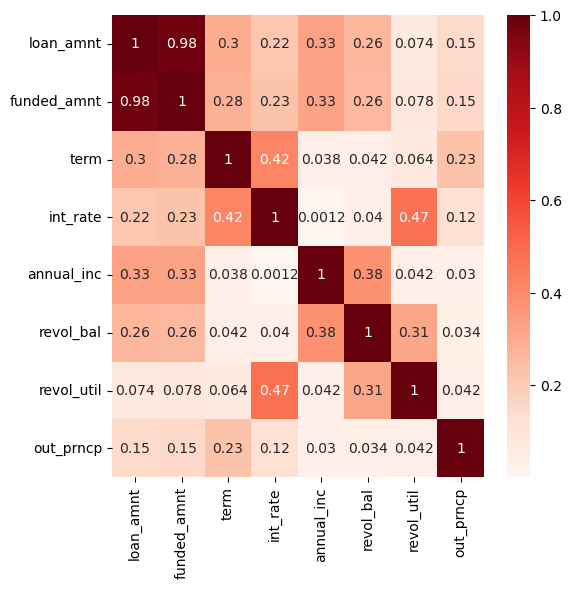

In [95]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df[['loan_amnt','funded_amnt','term','int_rate','annual_inc','revol_bal','revol_util','out_prncp']].corr(),annot=True,cmap="Reds")
plt.show()

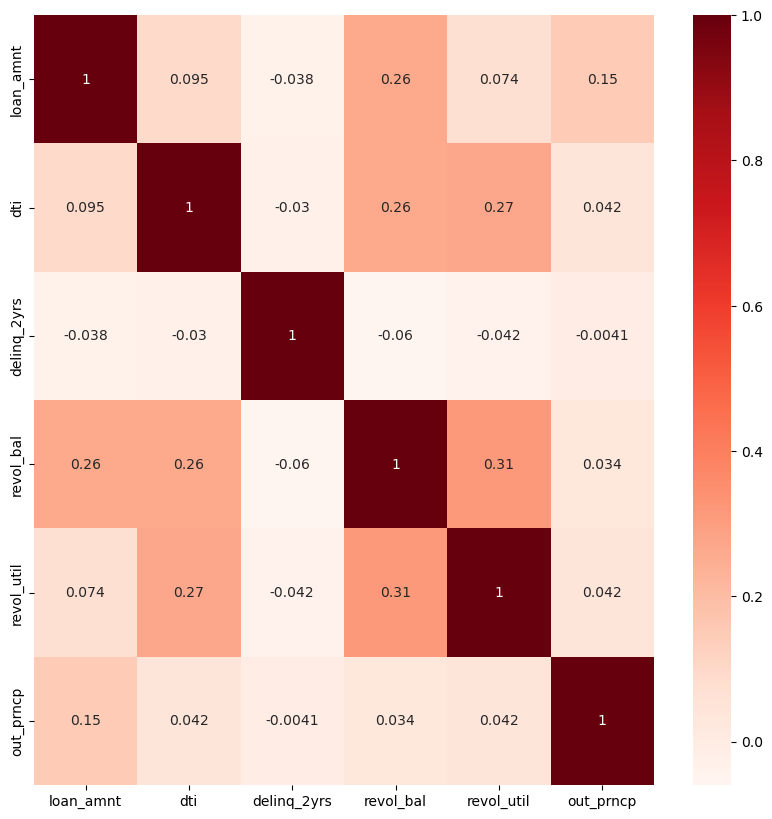

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[['loan_amnt','dti','delinq_2yrs','revol_bal','revol_util','out_prncp']].corr(),annot=True,cmap="Reds")
plt.show()

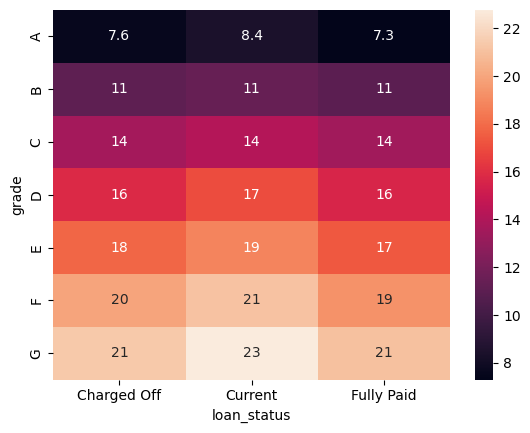

In [88]:
res1=pd.pivot_table(data=df,index="grade",columns="loan_status",values="int_rate")
sns.heatmap(res1,annot=True)
plt.show()

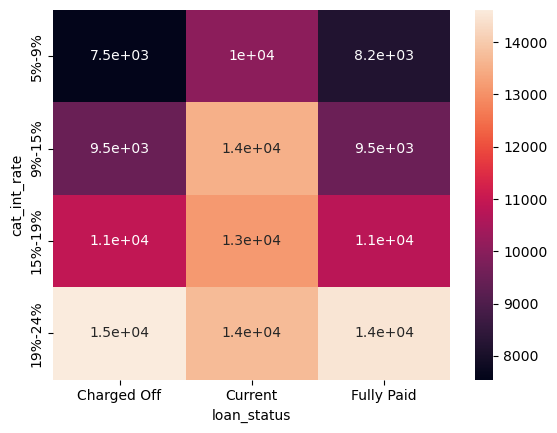

In [90]:
res2=pd.pivot_table(data=df,index="cat_int_rate",columns="loan_status",values="funded_amnt")
sns.heatmap(res2,annot=True)
plt.show()